## __ Ready for Assingment __
-  install [python](https://www.python.org/)

- install python
     - install [anaconda](https://www.continuum.io/downloads) for science, math, and data analysis.
     
       The installation process please refer to the __blackboard__.


- install libraries
     - install libraries
         
         - [pandas](http://pandas.pydata.org/), for data frames
         - [matplotlib](http://matplotlib.org/), for plotting
         - [requests](http://docs.python-requests.org/en/latest/), for fetching web content
         - [pattern](http://www.clips.ua.ac.be/pages/pattern) or [beautiful soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/), for parsing html and xml pages
         
------------------------------------------

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
!pip install requests

In [4]:
!pip install pattern

In [5]:
!pip install beautiful soup

### CHECK YOUR PYTHON VERSION
- #### Assingment made by python 3.x
- #### It will be easy for you to use same version with TA

In [6]:
import sys
sys.version

'3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]'

# HW2 - Data Scraping & Taste of Data Analysis

#### Data Science in Korea University
#### COSE471, Spring 2020
#### Due : 5/17 (SUN)  11:59 PM 

## Fetching coronavirus-19(COVID-19) pandemic data from Wikipedia

In this example we will fetch data about countries and their COVID-19 from Wikipedia.

https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic has several tables for individual countries, subcontinents as well as timelines. 


###We will go through the following steps:
* fetching html with embedded data
* parsing html to extract the data
* collecting the data in a panda dataframe
* displaying the data

To give you some starting points for your homework, we will also show the different sub-steps that can be taken to reach the presented solution.

In [7]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## 0. Fetching the Wikipedia site

#### print html code of presented page



> *`<!DOCTYPE html>`*<br/>
> *`<html class="client-nojs" lang="en" dir="ltr">`*<br/>
> *`<head>`*<br/>
> *`<meta charset="UTF-8"/>`*<br/>
> *`<title>2019–20 coronavirus pandemic by country and territory - Wikipedia</title>`*<br/>
> *`...`*<br/>
> *`</script>`*<br/>
> *`</body>`*<br/>
> *`</html>`*<br/>

##### Use requests library


In [8]:
url = 'https://en.wikipedia.org/wiki/2019%E2%80%9320_coronavirus_pandemic_by_country_and_territory'

###YOUR CODE HERE###
wiki_r=requests.get(url)

#print wiki_r.text
print (wiki_r.text)


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>COVID-19 pandemic by country and territory - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XrdRSApAMNUAABTqLC0AAAEO","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"COVID-19_pandemic_by_country_and_territory","wgTitle":"COVID-19 pandemic by country and territory","wgCurRevisionId":955824743,"wgRevisionId":955824743,"wgArticleId":62938755,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles containing potentially dated statements from May 2020","All articles containing pot

In [9]:
soup=BeautifulSoup(wiki_r.text, "lxml") #lxml for choosing parser 
type(soup) #this will show you type of given object

bs4.BeautifulSoup

## 1. Parsing html data

Data that we are going to use is table titled below:

#### Title: 2019–20 coronavirus pandemic by country and territory

*print html code of parsed table: 2019–20 coronavirus pandemic by country and territory*

> *`<table ... id="thetable">`*<br/>
> *`<tr>`*<br/>
> *`<th>#</th>`*<br/>
> *`<th>Countries and territories</th>`*<br/>
> *`...`*<br/>
> *`</td>`*<br/>
> *`</tr>`*<br/>
> *`</table>`*<br/>

##### Use BeautifulSoup
*hint: class/id can be assigned for elements of html.


In [10]:
"""Parse html and return html tables of wikipedia coronavirus_pandemic data."""

#step1: look at html source!"
#step2: get all tables"
all_tables = soup.find_all('table')
print(all_tables)

#step3: get table we care about" 
# 위의 설명에서, table 일뿐만 아니라, id="thetable" 이라는 속성을 갖고있다는 점을 활용했다
tables=soup.find_all('table',{'id':'thetable'})
print(tables)

# 이런 테이블이 몇 개나 있는지 파악하자 - 인덱스를 파악하기 쉽게
print("number of tables : ",len(tables))

# 결과
# number of tables = 1
# 따라서, 바로 아래 코드부터는 이 tables 를 접근하기 위해 tables[0] 로 접근한다 
# find_all 함수를 적용하기 위해선 이렇게 인덱싱을 해줘야 한다

[<table class="infobox" style="width:22em"><tbody><tr><th colspan="2" style="text-align:center;font-size:125%;font-weight:bold;background:#FFCCCB">COVID-19 pandemic</th></tr><tr><td colspan="2" style="text-align:center;border-bottom:#aaa 1px solid;"><a class="image" href="/wiki/File:COVID-19_Outbreak_World_Map_per_Capita.svg"><img alt="COVID-19 Outbreak World Map per Capita.svg" data-file-height="1500" data-file-width="2921" decoding="async" height="169" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3b/COVID-19_Outbreak_World_Map_per_Capita.svg/330px-COVID-19_Outbreak_World_Map_per_Capita.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3b/COVID-19_Outbreak_World_Map_per_Capita.svg/495px-COVID-19_Outbreak_World_Map_per_Capita.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/3b/COVID-19_Outbreak_World_Map_per_Capita.svg/660px-COVID-19_Outbreak_World_Map_per_Capita.svg.png 2x" width="330"/></a><div style="text-align:left;"><div class="center" style=

[<table class="wikitable plainrowheaders sortable" id="thetable" style="text-align:right; font-size:85%; margin:0 0 0.5em 1em;">
<caption><div class="covid-show-table" style="font-size:80%;font-weight:500;"><a href="#covid19-container">[show all]</a></div><div class="plainlinks hlist navbar mini" style="float:left; text-align:left"><ul><li class="nv-view"><a href="/wiki/Template:COVID-19_pandemic_data" title="Template:COVID-19 pandemic data"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:COVID-19_pandemic_data" title="Template talk:COVID-19 pandemic data"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:COVID-19_pandemic_data&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div><div style="font-size:114%;margin:0 4em"><span style="font-size:87.72%;"><span class="nowrap"><a href="/wiki/COVID-19_pandemic" t

## 2. Extracting data and filling it into a dictionary(Python data stucture)

#### Extract COVID-19 data for countries from table and store it in dictionary.
*Please print parsed dictionary at the end of code*

##### Shape of Dictionary
- { 'country_name': { 'cases' : 'num', 'deaths' : 'num', 'recovers' : 'num' }}
- *Dictionary data structure does not have order between Keys, so it may show up in different order(index).  You don't need to be worried of it*
- e.g. 'Uzbekistan': {'cases': '2,017', 'deaths': '9', 'recovers': '1,096'}, 'Puerto Rico': {'cases': '1,539', 'deaths': '92', 'recovers': '—'} ...

In [11]:
# 어떤 데이터들이 있는지, 먼저 확인부터 하자

# 1단계 : table_row 를 기준으로, 테이블의 모든 데이터들을 가져오자
    # 그러기 위해, tr 들을 모두 모아둔 list 를 하나 저장하자 : table_rows
table_rows = tables[0].find_all('tr')

idx = 0
for row in table_rows:
    print("index of table_rows : ",idx)
    idx+=1
    
     # 테이블의 행 탐색 : 각 행의 table_data, table_head 를 확인한다
        # - 내용이 너무 많으므로, 각 table_data 와 table_head 의 길이만 파악한다
    print("table_data len : ",len(row.find_all('td')))
    print("table_head len : ",len(row.find_all('th')))

# 결과
# 1, 2번째 row 에선 table_head 만 존재하고 table_data 는 없는걸로 봐서, 해당 테이블의 "열" 에 대한 정보를 갖고 있는 것 같다
# 또한, 3 번 이후의 row 들은 모두 table_data 를 갖고 있는걸로 봐서, 데이터들로만 구성된 row 를 갖고 있는 것 같다

index of table_rows :  0
table_data len :  0
table_head len :  5
index of table_rows :  1
table_data len :  0
table_head len :  5
index of table_rows :  2
table_data len :  4
table_head len :  2
index of table_rows :  3
table_data len :  4
table_head len :  2
index of table_rows :  4
table_data len :  4
table_head len :  2
index of table_rows :  5
table_data len :  4
table_head len :  2
index of table_rows :  6
table_data len :  4
table_head len :  2
index of table_rows :  7
table_data len :  4
table_head len :  2
index of table_rows :  8
table_data len :  4
table_head len :  2
index of table_rows :  9
table_data len :  4
table_head len :  2
index of table_rows :  10
table_data len :  4
table_head len :  2
index of table_rows :  11
table_data len :  4
table_head len :  2
index of table_rows :  12
table_data len :  4
table_head len :  2
index of table_rows :  13
table_data len :  4
table_head len :  2
index of table_rows :  14
table_data len :  4
table_head len :  2
index of table_rows 

table_head len :  2
index of table_rows :  226
table_data len :  4
table_head len :  2
index of table_rows :  227
table_data len :  4
table_head len :  2
index of table_rows :  228
table_data len :  4
table_head len :  2
index of table_rows :  229
table_data len :  4
table_head len :  2
index of table_rows :  230
table_data len :  4
table_head len :  2
index of table_rows :  231
table_data len :  1
table_head len :  0
index of table_rows :  232
table_data len :  1
table_head len :  0


In [12]:
# 1번째 row 의 내용물을 모두 확인해본다 - table_head
for tmp in table_rows[0].find_all('th'):
    print(tmp)

print("\n\nresult : \n")
for tmp in table_rows[0].find_all('th'):
    print(tmp.get_text())    

# 결과
# location, cases, deaths, recov 로 구성됨
# 과제에서 요구하는 정보가 이 네가지이므로, 앞으로 데이터에서 순서대로 저장해야함을 알 수 있다

<th class="covid-country-narrow-on-mobile" colspan="2" scope="col" style="text-align:left;">Locations<sup class="reference" id="cite_ref-7"><a href="#cite_note-7">[b]</a></sup>
</th>
<th scope="col" style="text-align:left;">Cases<sup class="reference" id="cite_ref-ccc_5-1"><a href="#cite_note-ccc-5">[a]</a></sup>
</th>
<th scope="col" style="text-align:left;">Deaths<sup class="reference" id="cite_ref-9"><a href="#cite_note-9">[c]</a></sup>
</th>
<th data-sort-type="number" scope="col" style="text-align:left;"><abbr title="Recoveries">Recov.</abbr><sup class="reference" id="cite_ref-10"><a href="#cite_note-10">[d]</a></sup>
</th>
<th class="unsortable" scope="col" style="text-align:right; width:1px;"><abbr title="Reference(s)">Ref.</abbr>
</th>


result : 

Locations[b]

Cases[a]

Deaths[c]

Recov.[d]

Ref.



In [13]:
# 2번째 row 의 내용물을 모두 확인해본다 - table_head
for tmp in table_rows[1].find_all('th'):
    print(tmp)

print("\n\nresult : \n")
for tmp in table_rows[1].find_all('th'):
    print(tmp.get_text()) 

# 결과
# 첫 번째 table_head 값은 locations 였는데, 2번째 row 의 첫 번째 table_head 가 정수로 나왔다
# 따라서, 내가 수집해야 하는 정보와는 상관 없는 정보라고 생각하고 넘어간다

<th colspan="2" style="text-align:right; padding: 0 2px;">229
</th>
<th style="text-align:right; padding: 0 2px;">4,018,342
</th>
<th style="text-align:right; padding: 0 2px;">278,756
</th>
<th style="text-align:right; padding: 0 2px;">1,363,698
</th>
<th style="text-align:right; padding: 0 2px;"><sup class="reference" id="cite_ref-JHU_ticker_4-7"><a href="#cite_note-JHU_ticker-4">[4]</a></sup>
</th>


result : 

229

4,018,342

278,756

1,363,698

[4]



In [14]:
# 2번째 row 의 내용물을 모두 확인해본다 (1) - table_head
for tmp in table_rows[2].find_all('th'):
    print(tmp)

print("\n\nresult (1) : \n")
for tmp in table_rows[2].find_all('th'):
    print(tmp.get_text())   

print("\n\nresult (2): \n")
# 2번째 row 의 내용물을 모두 확인해본다 (2) - table_data
for tmp in table_rows[2].find_all('td'):
    print(tmp.get_text())   
    
# 결과
# table_head 부분에 locations 가,
# table_data 부분에 cases, deaths, recov 가 나열된다
# 이 정보들을 담아내는 set 을 이제 만들면 된다

<th scope="row"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/>
</th>
<th scope="row"><a href="/wiki/COVID-19_pandemic_in_the_United_States" title="COVID-19 pandemic in the United States">United States</a><sup class="reference" id="cite_ref-17"><a href="#cite_note-17">[e]</a></sup>
</th>


result (1) : 



United States[e]



result (2): 

1,342,476

79,645

189,330

[13]



In [15]:
# extract headings and actual data and combine data into single dict

###YOUR CODE HERE###
rst_set={}
cnt=0
for row in table_rows:
    if cnt<2 or len(row)<12 :
        cnt+=1
        continue
    
    
    # locations 정보 담기 (1)
    row_head = row.find_all('th')
    row_head = row_head[1].get_text()[:-1]
    
    # locations 정보 담기 (2) - 전처리하기 : [~] 제거
    if row_head[-1] == ']':
        while 1:
            row_head = row_head[:-1]
            if row_head[-1] == '[':
                row_head = row_head[:-1]
                break            
    
    # cases, deaths, recovers 정보 담기
    row_data = row.find_all('td')
    
    tmp_set={}
    tmp_set['cases'] = row_data[0].get_text()[:-1]
    tmp_set['deaths'] = row_data[1].get_text()[:-1]
    tmp_set['recovers'] = row_data[2].get_text()[:-1]
    
    # 최종 결과 set 만들어서, rst_list 에 담기    
    rst_set[row_head]=tmp_set
    
print(rst_set)

{'United States': {'cases': '1,342,476', 'deaths': '79,645', 'recovers': '189,330'}, 'Spain': {'cases': '223,578', 'deaths': '26,478', 'recovers': '133,952'}, 'Italy': {'cases': '218,268', 'deaths': '30,395', 'recovers': '103,031'}, 'United Kingdom': {'cases': '215,260', 'deaths': '31,587', 'recovers': 'No data'}, 'Russia': {'cases': '198,676', 'deaths': '1,827', 'recovers': '31,916'}, 'Germany': {'cases': '171,324', 'deaths': '7,549', 'recovers': '138,330'}, 'Brazil': {'cases': '156,061', 'deaths': '10,656', 'recovers': '61,685'}, 'France': {'cases': '138,854', 'deaths': '26,310', 'recovers': '56,038'}, 'Turkey': {'cases': '137,115', 'deaths': '3,739', 'recovers': '89,480'}, 'Iran': {'cases': '106,220', 'deaths': '6,589', 'recovers': '86,064'}, 'China': {'cases': '82,887', 'deaths': '4,633', 'recovers': '78,046'}, 'Canada': {'cases': '67,702', 'deaths': '4,693', 'recovers': '31,249'}, 'Peru': {'cases': '65,015', 'deaths': '1,814', 'recovers': '20,246'}, 'India': {'cases': '59,662', 'd

## 3. Creating a dataframe(Python data structure) from a dictionary

* Shape of dataframe must be like following table.
* i.e. indices: country_name, columns: cases, deaths, recovers
<table>
  <tr>
    <th></th>
    <th>cases</th>
    <th>deaths</th>
    <th>recovers</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>1,095,645</td>
    <td>63,746</td>
    <td>132,544</td>
  </tr>
  <tr>
    <td>Spain</td>
    <td>213,435</td>
    <td>24,543</td>
    <td>112,050</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Saint Pierre & Miquelon</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
  </tr>
</table>

In [16]:
#step1: create dataframe(indices: country_name, columns: cases, deaths, recovers)
# Use the following code
df = pd.DataFrame.from_dict(rst_set, orient='index')
print(df)

#step2: replace '-' to 0
for i in range(0, len(df['cases'])):
    df['cases'][i] = df['cases'][i].replace("No data","0")
    df['deaths'][i] = df['deaths'][i].replace("No data","0")
    df['recovers'][i] = df['recovers'][i].replace("No data","0")
    
    df['cases'][i] = df['cases'][i].replace(",","")
    df['deaths'][i] = df['deaths'][i].replace(",","")
    df['recovers'][i] = df['recovers'][i].replace(",","")
print(df)

                             cases  deaths recovers
United States            1,342,476  79,645  189,330
Spain                      223,578  26,478  133,952
Italy                      218,268  30,395  103,031
United Kingdom             215,260  31,587  No data
Russia                     198,676   1,827   31,916
...                            ...     ...      ...
South Ossetia                    3       0        0
Bonaire                          2       0        2
Saba                             2       0        1
Sint Eustatius                   2       0        2
Saint Pierre & Miquelon          1       0        0

[229 rows x 3 columns]
                           cases deaths recovers
United States            1342476  79645   189330
Spain                     223578  26478   133952
Italy                     218268  30395   103031
United Kingdom            215260  31587        0
Russia                    198676   1827    31916
...                          ...    ...      ...
South Oss

## 4-1. Adding some data(death rates) from the original dataframe

* Calculate death rates by 'deaths/cases'
* Add the death rates column to original data frame named 'death_rates'
* Decimal place of death rates is two. i.e. 0.26

<table>
  <tr>
    <th></th>
    <th>cases</th>
    <th>deaths</th>
    <th>recovers</th>
    <th>death_rates</th>
  </tr>
  <tr>
    <td>United States</td>
    <td>1095645</td>
    <td>63746</td>
    <td>132544</td>
    <td>0.06</td>
  </tr>
  <tr>
    <td>Spain</td>
    <td>213435</td>
    <td>24543</td>
    <td>112050</td>
    <td>0.11</td>
  </tr>
  <tr>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;...&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <td></td>
  </tr>
  <tr>
    <td>Saint Pierre & Miquelon</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0.00</td>
  </tr>
</table>

In [17]:
#step1: calculate death rates(to calculate death rates, strings in dataframe should be converted to numeric datas)
df = df.astype(str).astype(int)
print(df.dtypes)

#step2: add "death_rates" column to dataframe 
df['death_rates'] = df['deaths']/df['cases']
df['death_rates'] = df['death_rates'].round(2)
print(df)

#step3: sort based on death rates 
df = df.sort_values(by=['death_rates'], axis=0, ascending=False)
print(df)

cases       int32
deaths      int32
recovers    int32
dtype: object
                           cases  deaths  recovers  death_rates
United States            1342476   79645    189330         0.06
Spain                     223578   26478    133952         0.12
Italy                     218268   30395    103031         0.14
United Kingdom            215260   31587         0         0.15
Russia                    198676    1827     31916         0.01
...                          ...     ...       ...          ...
South Ossetia                  3       0         0         0.00
Bonaire                        2       0         2         0.00
Saba                           2       0         1         0.00
Sint Eustatius                 2       0         2         0.00
Saint Pierre & Miquelon        1       0         0         0.00

[229 rows x 4 columns]
                         cases  deaths  recovers  death_rates
Abkhazia                     3       1         2         0.33
Nicaragua       

## 5-1. Print top 5 countries with the highest/lowest death rates by COVID-19. (total 10 countries)

In [18]:
# highest 5
print(df[0:5])

# lowest 5
num_country = len(df)
print(df[num_country - 5 :])

              cases  deaths  recovers  death_rates
Abkhazia          3       1         2         0.33
Nicaragua        16       5         7         0.31
MS Zaandam       13       4         0         0.31
Yemen            34       7         1         0.21
Sint Maarten     77      15        46         0.19
                         cases  deaths  recovers  death_rates
Madagascar                 193       0       101          0.0
Grenada                     21       0        13          0.0
Laos                        19       0         9          0.0
Fiji                        18       0        14          0.0
Saint Pierre & Miquelon      1       0         0          0.0


## 5-2. Create a sub-dataframe for the five countries extracted in question 5-1(highest case).

<table class="tg">
  <tr>
    <th class="tg-yw4l"></th>
    <th class="tg-yw4l">cases</th>
    <th class="tg-yw4l">deaths</th>
    <th class="tg-baqh">recovers</th>
    <th class="tg-yw4l">death_rates</th>
  </tr>
  <tr>
    <td class="tg-yw4l">country_name1   </td>
    <td class="tg-yw4l">                    </td>
    <td class="tg-yw4l">                    </td>
    <td class="tg-yw4l">              </td>
    <td class="tg-yw4l">                    </td>
  </tr>
  <tr>
    <td class="tg-yw4l">country_name2</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-baqh">...</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
  <tr>
    <td class="tg-yw4l">country_name5</td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
    <td class="tg-yw4l"></td>
  </tr>
</table>

In [19]:
# Create a sub-dataframe for the five countries extracted in question 5-1(highest case).
top5_df = df[0:5]

print(top5_df)
print(type(top5_df))

              cases  deaths  recovers  death_rates
Abkhazia          3       1         2         0.33
Nicaragua        16       5         7         0.31
MS Zaandam       13       4         0         0.31
Yemen            34       7         1         0.21
Sint Maarten     77      15        46         0.19
<class 'pandas.core.frame.DataFrame'>


## 5-3. Plot Grouped bar chart with labels using dataframe that created from problem 5-2.

In [31]:
###YOUR CODE HERE###
# Use the following code(you can use log scale for better visualize)
import numpy as np

labels = []
cases = []
deaths = []
recovers = []
death_rates = []
for i in range(0,5):
    labels.append(top5_df.index[i])
    cases.append(top5_df['cases'][i])
    deaths.append(top5_df['deaths'][i])
    recovers.append(top5_df['recovers'][i])
    death_rates.append(top5_df['death_rates'][i])

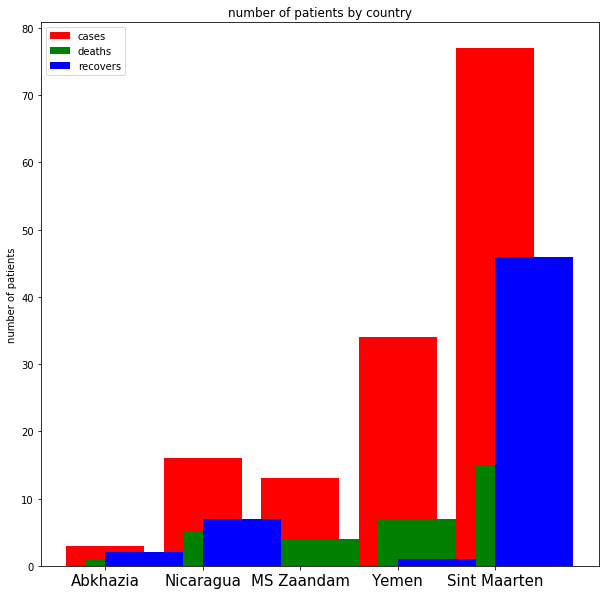

In [35]:
# grouped bar chart 를 표현한다 : 여러 개의 값들을 하나에 표현

bar_width = 0.2
alpha = 1
index = np.arange(len(labels))

plt.figure(figsize=(10,10))

bar1 = plt.bar(index, cases, color='r', alpha = alpha, label='cases')
bar2 = plt.bar(index + bar_width, deaths, color='g', alpha = alpha, label='deaths')
bar3 = plt.bar(index + bar_width + bar_width, recovers, color='b', alpha = alpha, label='recovers')

plt.xticks(index, labels, fontsize=15)

plt.title("number of patients by country")
plt.ylabel("number of patients")
plt.legend((bar1[0], bar2[0], bar3[0]),('cases', 'deaths','recovers'))
plt.show()


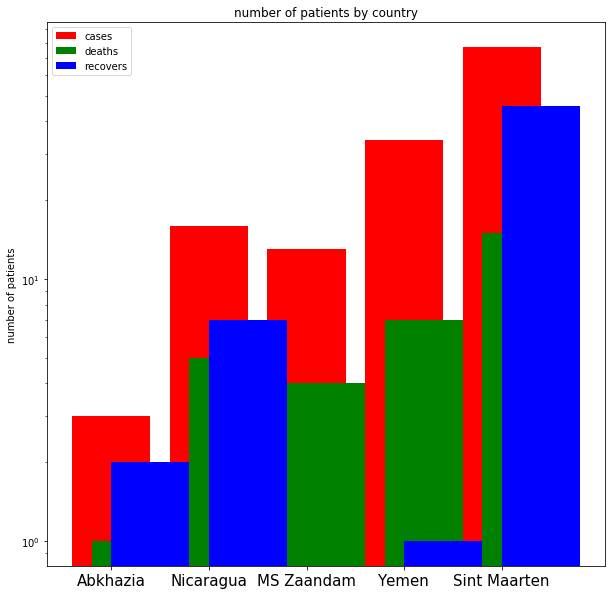

In [36]:
# log scale 로 다시 표현하기 - grouped bar chart 를 표현한다 : 여러 개의 값들을 하나에 표현

bar_width = 0.2
alpha = 1
index = np.arange(len(labels))

plt.figure(figsize=(10,10))

bar1 = plt.bar(index, cases, color='r', alpha = alpha, label='cases')
bar2 = plt.bar(index + bar_width, deaths, color='g', alpha = alpha, label='deaths')
bar3 = plt.bar(index + bar_width + bar_width, recovers, color='b', alpha = alpha, label='recovers')

plt.xticks(index, labels, fontsize=15)
plt.yscale('log')

plt.title("number of patients by country")
plt.ylabel("number of patients")
plt.legend((bar1[0], bar2[0], bar3[0]),('cases', 'deaths','recovers'))
plt.show()

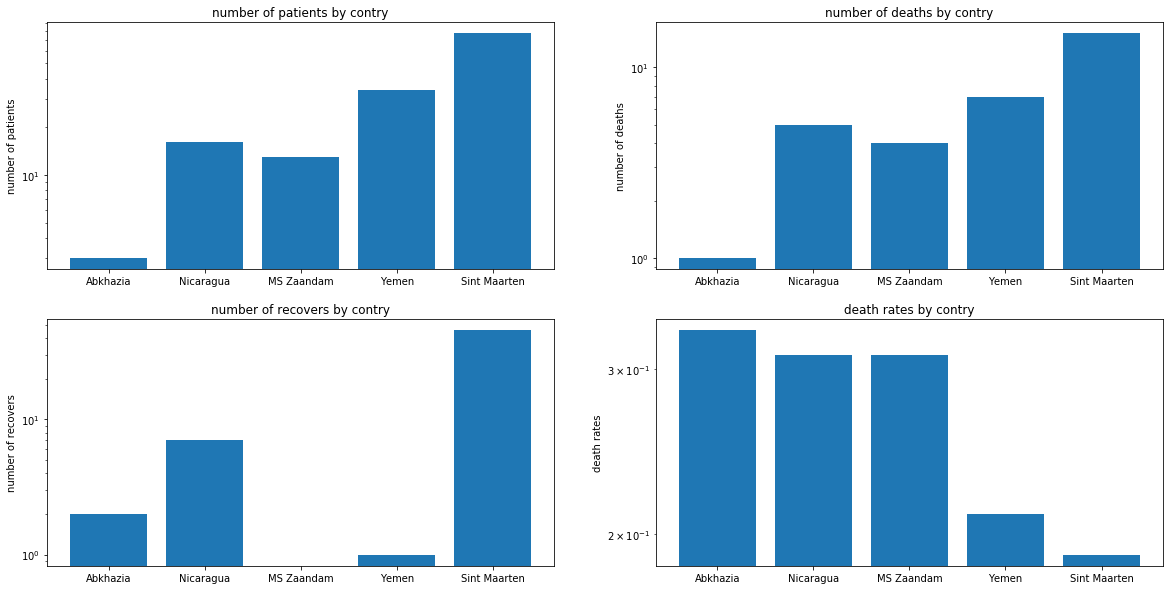

In [49]:
# 각각의 값들을 개별적으로 확인하고싶다 - 각각 bar chart 로 표현

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.set_ylabel('number of patients')
ax1.set_title('number of patients by contry')
ax1.bar(labels, cases)
ax1.set_yscale('log')

ax2.set_ylabel('number of deaths')
ax2.set_title('number of deaths by contry')
ax2.bar(labels, deaths)
ax2.set_yscale('log')

ax3.set_ylabel('number of recovers')
ax3.set_title('number of recovers by contry')
ax3.bar(labels, recovers)
ax3.set_yscale('log')

ax4.set_ylabel('death rates')
ax4.set_title('death rates by contry')
ax4.bar(labels, death_rates)
ax4.set_yscale('log')

In [23]:
## 상위 5개 국가를 했는데, 프랑스의 수치가 다른 국가와 차이가 너무 나다보니 제대로 차이를 보기 힘들었다
## 그래서, 상위 4개의 국가를 기준으로 다시 한 번 시도했다

top4_df = df[0:4]

print(top4_df)
print(type(top4_df))

###YOUR CODE HERE###
# Use the following code(you can use log scale for better visualize)
import numpy as np

labels = []
cases = []
deaths = []
recovers = []
death_rates = []
for i in range(0,4):
    labels.append(top4_df.index[i])
    cases.append(top4_df['cases'][i])
    deaths.append(top4_df['deaths'][i])
    recovers.append(top4_df['recovers'][i])
    death_rates.append(top4_df['death_rates'][i])

            cases  deaths  recovers  death_rates
Abkhazia        3       1         2         0.33
Nicaragua      16       5         7         0.31
MS Zaandam     13       4         0         0.31
Yemen          34       7         1         0.21
<class 'pandas.core.frame.DataFrame'>


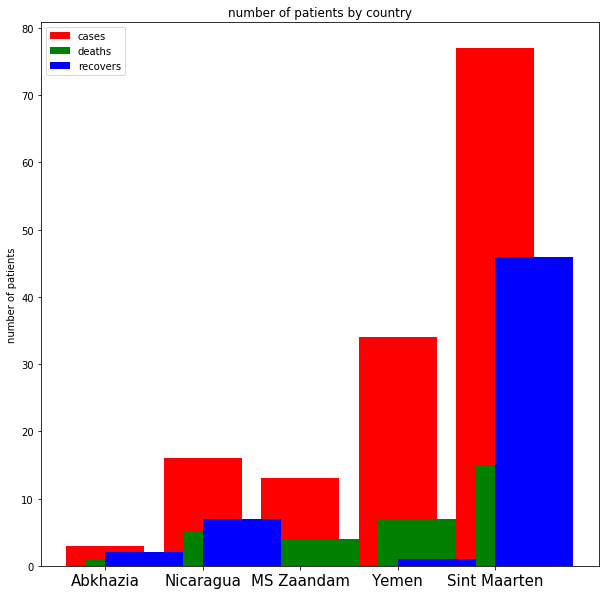

In [39]:
# grouped bar chart 를 표현한다 : 여러 개의 값들을 하나에 표현

bar_width = 0.2
alpha = 1
index = np.arange(len(labels))

plt.figure(figsize=(10,10))
bar1 = plt.bar(index, cases, color='r', alpha = alpha, label='cases')
bar2 = plt.bar(index + bar_width, deaths, color='g', alpha = alpha, label='deaths')
bar3 = plt.bar(index + bar_width + bar_width, recovers, color='b', alpha = alpha, label='recovers')

plt.xticks(index, labels, fontsize=15)

plt.legend((bar1[0], bar2[0], bar3[0]),('cases', 'deaths','recovers'))
plt.title("number of patients by country")
plt.ylabel("number of patients")
plt.show()

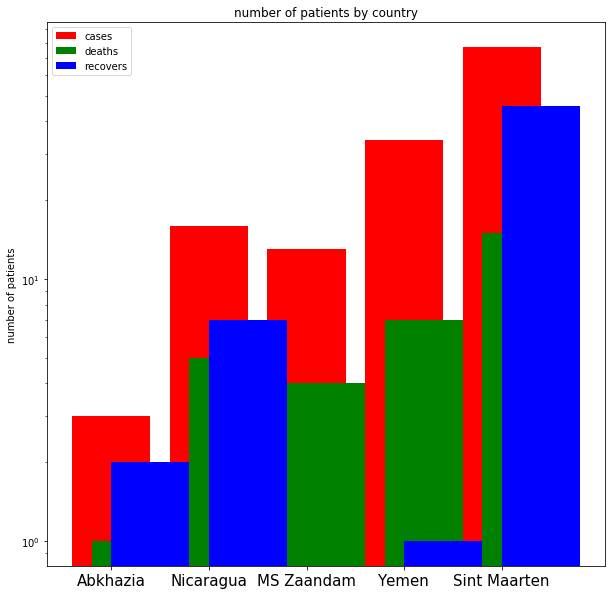

In [40]:
# log scale 로 다시 표현하기 - grouped bar chart 를 표현한다 : 여러 개의 값들을 하나에 표현

bar_width = 0.2
alpha = 1
index = np.arange(len(labels))

plt.figure(figsize=(10,10))
bar1 = plt.bar(index, cases, color='r', alpha = alpha, label='cases')
bar2 = plt.bar(index + bar_width, deaths, color='g', alpha = alpha, label='deaths')
bar3 = plt.bar(index + bar_width + bar_width, recovers, color='b', alpha = alpha, label='recovers')

plt.xticks(index, labels, fontsize=15)
plt.yscale('log')

plt.legend((bar1[0], bar2[0], bar3[0]),('cases', 'deaths','recovers'))
plt.title("number of patients by country")
plt.ylabel("number of patients")
plt.show()

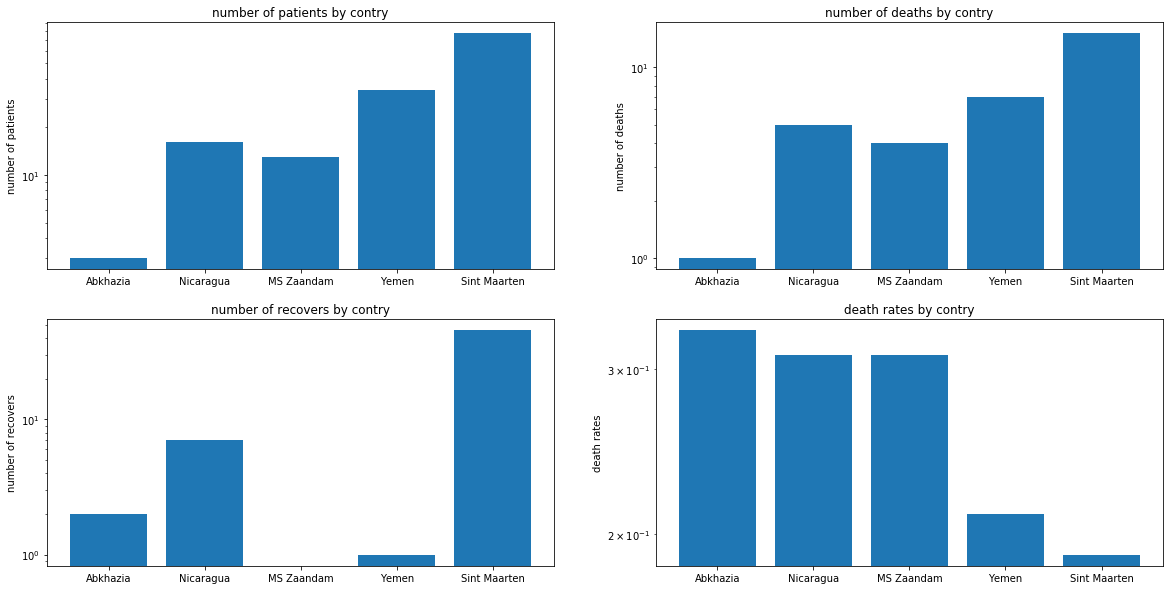

In [51]:
# 각각의 값들을 개별적으로 확인하고싶다 - 각각 bar chart 로 표현

fig = plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.set_ylabel('number of patients')
ax1.set_title('number of patients by contry')
ax1.bar(labels, cases)
ax1.set_yscale('log')

ax2.set_ylabel('number of deaths')
ax2.set_title('number of deaths by contry')
ax2.bar(labels, deaths)
ax2.set_yscale('log')

ax3.set_ylabel('number of recovers')
ax3.set_title('number of recovers by contry')
ax3.bar(labels, recovers)
ax3.set_yscale('log')

ax4.set_ylabel('death rates')
ax4.set_title('death rates by contry')
ax4.bar(labels, death_rates)
ax4.set_yscale('log')